In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [29]:
# plot styles
all_styles = list(plt.style.available)
all_styles

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
df1 = pd.read_csv("Udata/ecorp data.csv")
df2 = pd.read_csv("Udata/ecom expense.csv")

In [4]:
df1.head()

,Name,Sales (₦),Date
0,Sebastian Waite,607193,1/1/2020
1,Lizzie Haggins,1171366,1/1/2020
2,Ima Gaudreau,941504,1/1/2020
3,Leticia Michelsen,721826,1/1/2020
4,Stanley Margolin,904494,1/1/2020


In [5]:
df2.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [6]:
# changing column Dtype
df2["Gender"] = df2["Gender"].astype("str")

In [7]:
# selecting rows with specific names
somenames = df1[df1["Name"].isin(["stanley Margolin","Latina Terry","Lizzie Haggins"])]
somenames.head()

,Name,Sales (₦),Date
1,Lizzie Haggins,1171366,1/1/2020
69,Lizzie Haggins,571388,3/1/2020
662,Latina Terry,563347,23/1/2020
867,Lizzie Haggins,1110682,30/1/2020
868,Lizzie Haggins,963565,30/1/2020


In [8]:
# renaming columns
df1.rename(columns = {"Sales (₦)" : "Sales"}, inplace = True)

### Scatter plot

#### Note
It's important to find outliers in your dataset. Outliers are not harmful/problematic when performing analysis but are when dealing with descriptive and predictive analysis/analytics in machine learning.

<AxesSubplot:xlabel='City Tier', ylabel='Age '>

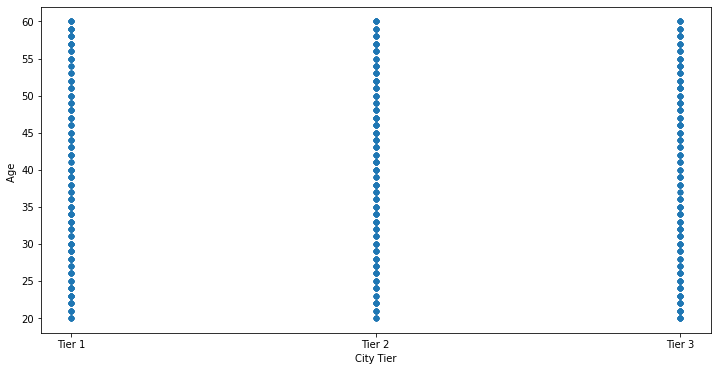

In [9]:
df2.plot.scatter("City Tier", "Age ", figsize=(12, 6))

# * or plt.scatter(df_two["City Tier"], df_two["Age "])
#   plt.show() *

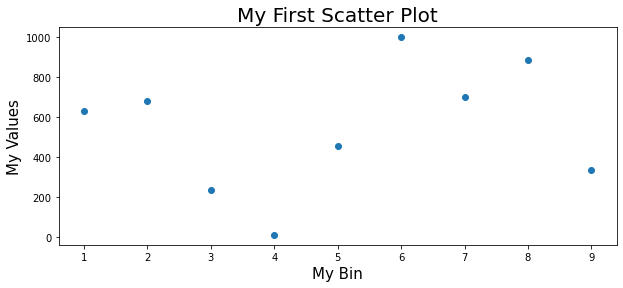

In [10]:
# Example
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [630, 679, 234, 9, 456, 1000, 702, 888, 333]

plt.figure(figsize = (10, 4))
plt.scatter(x, y)
plt.title("My First Scatter Plot", fontsize=20)
plt.xlabel("My Bin", size=15)
plt.ylabel("My Values", size=15)
plt.show()

### Line plot

In [11]:
df1["Date"] = df1["Date"].apply(lambda c: dt.strptime(c, "%d/%m/%Y"))

df1["Month"] = df1["Date"].apply(lambda c: dt.strftime(c, "%b"))

grouped_data = pd.DataFrame(df1.groupby("Month")["Sales"].sum())
grouped_data

,Sales
Month,
Apr,679951155
Aug,705610454
Feb,653702163
Jan,655053020
Jul,679750493
Jun,661428040
Mar,682581876
May,693291300
Nov,650896427


In [12]:
# setting our DataFrame to a shorthand variable name
groupd = pd.DataFrame(grouped_data)

# month order
sort_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
              "Jul", "Aug", "Sep", "Oct", "Nov"]

# resetting index
groupd = groupd.reset_index(drop=False)

# adding new month index, to help with categorical sorting
groupd.index = pd.Categorical(groupd['Month'], categories=sort_month, ordered=True)

# sorting with the month index and dropping it right after
groupd = groupd.sort_index().reset_index(drop = True)
groupd

,Month,Sales
0,Jan,655053020
1,Feb,653702163
2,Mar,682581876
3,Apr,679951155
4,May,693291300
5,Jun,661428040
6,Jul,679750493
7,Aug,705610454
8,Sep,707486354
9,Oct,705718831


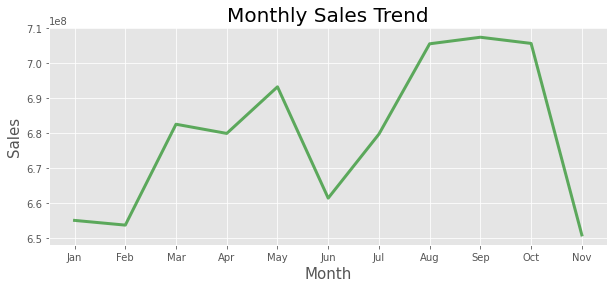

In [35]:
# line plot; default plot is also line
plt.figure(figsize=(10, 4))
plt.plot(groupd["Month"], groupd["Sales"], linewidth=3, alpha=0.6, color="green")

# setting plot characteristics
plt.title("Monthly Sales Trend", fontsize=20)
plt.xlabel("Month", size=15)
plt.ylabel("Sales", size=15)
plt.show()

In [14]:
# finding a particular name and finding a name based on a str
df_shea = df1[df1["Name"] == "Shae Buggs"]
df_linnea = df1[df1["Name"].str.contains("Linnea")]
df_shea.head(3), df_linnea.head(3)

(            Name    Sales       Date Month
 498   Shae Buggs  1258970 2020-01-17   Jan
 645   Shae Buggs   249886 2020-01-22   Jan
 1252  Shae Buggs   879467 2020-02-13   Feb,
               Name    Sales       Date Month
 519  Linnea Molton   147975 2020-01-18   Jan
 566  Linnea Molton  1098863 2020-01-20   Jan
 898  Linnea Molton   161852 2020-02-01   Feb)

In [15]:
# grouping Dataframes according to sales
sales_sb = df_shea[["Name", "Month", "Sales"]].groupby(["Name", "Month"]).sum().reset_index()
sales_lm = df_linnea[["Name", "Month", "Sales"]].groupby(["Name", "Month"]).sum().reset_index()

# month order
sort_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
              "Jul", "Aug", "Sep", "Oct", "Nov"]

# adding new month index, to help with categorical sorting
sales_sb.index = pd.Categorical(sales_sb['Month'], categories=sort_month, ordered=True)
sales_lm.index = pd.Categorical(sales_lm['Month'], categories=sort_month, ordered=True)

# sorting with the month index and dropping it right after
sales_sb = sales_sb.sort_index().reset_index(drop = True)
sales_lm = sales_lm.sort_index().reset_index(drop = True)

sales_sb.head(3), sales_lm.head(3)

(         Name Month    Sales
 0  Shae Buggs   Jan  1508856
 1  Shae Buggs   Feb  1273733
 2  Shae Buggs   Mar  3106215,
             Name Month    Sales
 0  Linnea Molton   Jan  1246838
 1  Linnea Molton   Feb  1551739
 2  Linnea Molton   Mar  2800994)

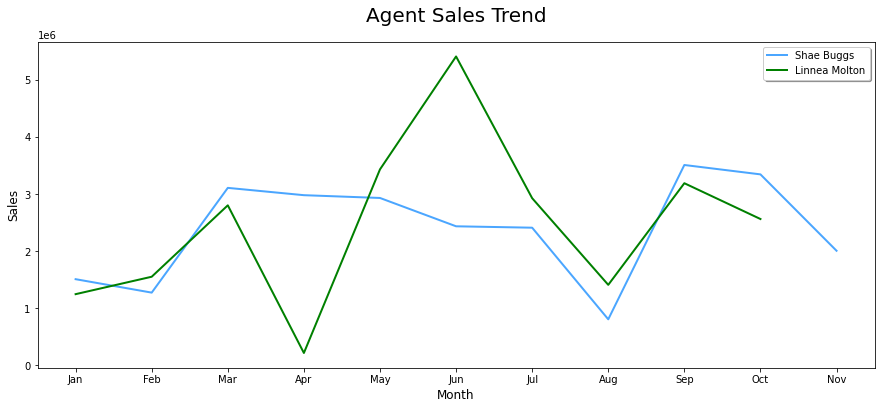

In [16]:
# plotting
plt.figure(figsize = (15, 6))
plt.plot(sales_sb["Month"], sales_sb["Sales"], linewidth = 2, alpha = 0.80, color = "dodgerblue", label = "Shae Buggs")
plt.plot(sales_lm["Month"], sales_lm["Sales"], linewidth = 2, alpha = 1, color = "green", label = "Linnea Molton")

# OR
# *** fig, axs = plt.subplots(figsize=(12, 6))
#     sales_sb.plot("Month", "Sales", linewidth=2, alpha=0.80, color="dodgerblue", label="Shae Buggs", ax=axs)
#     sales_lm.plot("Month", "Sales", linewidth=2, alpha=1, color="green", label="Linnea Molton", ax=axs)

# customizing plots
plt.title("Agent Sales Trend", fontsize = 20, pad = 20)
plt.xlabel("Month", size = 12)
plt.ylabel("Sales", size = 12)

# positioning legend default loc is "best"
plt.legend(shadow = True)
plt.show()

### Bar chart

Used to represent volume of a certain distribution

In [17]:
df2.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [18]:
groupdf = df2.groupby("City Tier")["Transaction ID"].count().reset_index()
groupdf

,City Tier,Transaction ID
0,Tier 1,815
1,Tier 2,782
2,Tier 3,765


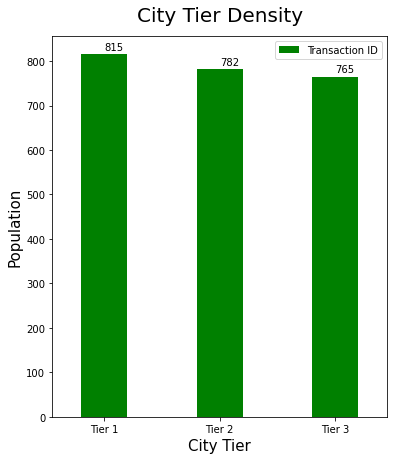

In [19]:
groupdf.plot.bar("City Tier", "Transaction ID", width=0.4, color="green", figsize=(6, 7))

# customizing
plt.title("City Tier Density", fontsize=20, pad=15)
plt.xlabel("City Tier", size=15)
plt.xticks(rotation=0)
plt.ylabel("Population", size=15)

# labelling the bars with equivalent values; x=x-axis, y=y-axis, s=str
for index, value in enumerate(groupdf["Transaction ID"]):
    plt.text(x=index, y=value + 10, s=f"{value}")

In [20]:
gendf = df2[["City Tier", "Gender", "Transaction ID"]].groupby(["Gender", "City Tier"]).count()
gendf

Transaction ID
Gender City Tier                
Female Tier 1                403
       Tier 2                384
       Tier 3                375
Male   Tier 1                412
       Tier 2                398
       Tier 3                390

In [21]:
left = gendf["Transaction ID"][:3]
right = gendf["Transaction ID"][3:]

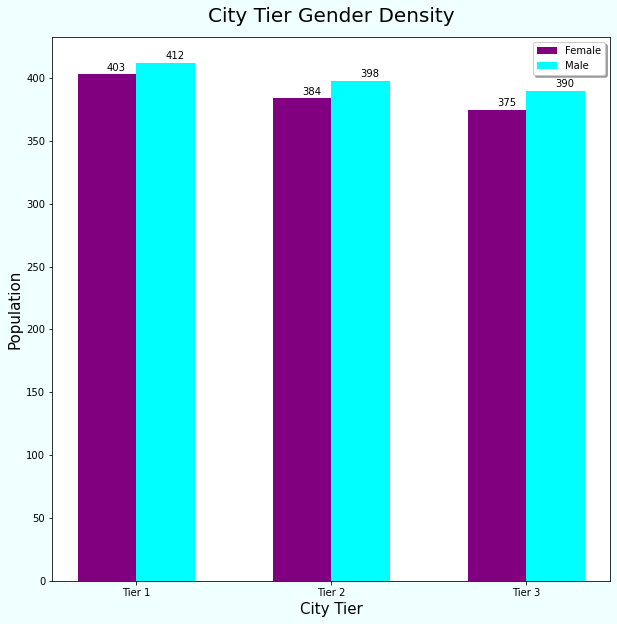

In [22]:
# similar to range in python, arange = array range
plt.figure(figsize=(10, 10), facecolor="azure")
ind = np.arange(3)
labels = ["Tier 1", "Tier 2", "Tier 3"]
w = 0.3

plt.bar(ind, left, width=w, color="purple", label="Female")
plt.bar(ind + w, right, width=w, color="cyan", label="Male")
plt.title("City Tier Gender Density", fontsize=20, pad=15)
plt.xlabel("City Tier", size=15)
plt.ylabel("Population", size=15)
plt.legend(loc="best", shadow=True)
plt.xticks(ind+w/2, labels)


# labelling the bars with equivalent values; x=x-axis, y=y-axis, s=str, val=value of left, var=value of right
for index, (val, var) in enumerate(zip(left, right)):
    plt.text(x=index, y= val + 3, s=f"{val}")
    plt.text(x=index + w, y=var + 3, s=f"{var}")

plt.show()

### Vertically Stacked Bar Chart

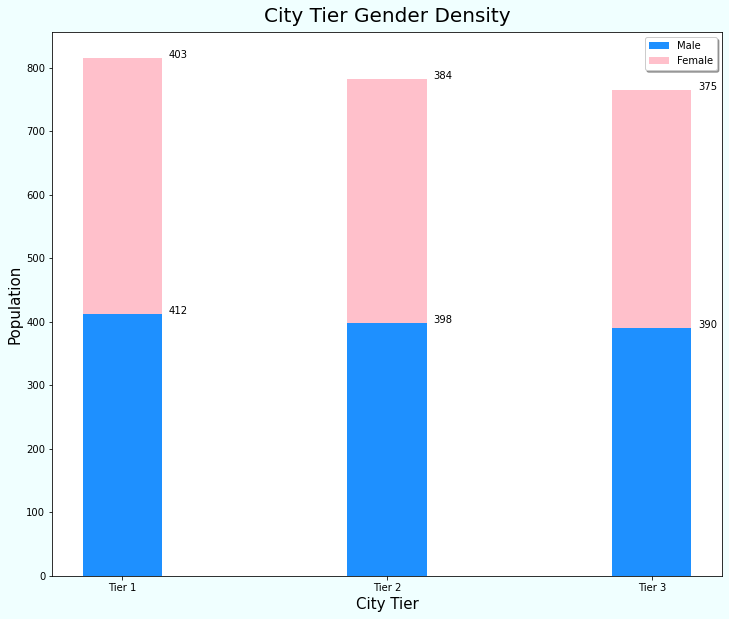

In [23]:
# nunique gives you a count of the values, unique gives you the values themselves
# 
plt.figure(figsize=(12, 10), facecolor="azure")
ind = np.arange(df2["City Tier"].nunique())
tick_labels = df2["City Tier"].unique()

# width for value labels on chart 
w=0.175 

# chart to be plotted at the `bottom`
plt.bar(ind, right, width=0.3, color="dodgerblue", label="Male")

# the `bottom` attribute helps to stack our charts vertically
# if it was a 3 level stack, bottom=(first level + second level)
plt.bar(ind, left, width=0.3, color="pink", label="Female", bottom=right)

# customize chart
plt.title("City Tier Gender Density", fontsize=20, pad=10)
plt.ylabel("Population", size=15)
plt.xlabel("City Tier", size=15)
plt.xticks(ind, tick_labels)
plt.legend(loc="best", shadow=True)

for index, (val, var) in enumerate(zip(left, right)):
    plt.text(x=index + w, y=val + var, s=f"{val}")
    plt.text(x=index + w, y=var, s=f"{var}")

# show plotted chart; when saving a chart; use plt.savefig("figname") instead of plt.show()
plt.savefig("City Tier Gender Density.png") # plt.show()



In [24]:
df2["City Tier"].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

### Pier Chart

In [25]:
groupd

,Month,Sales
0,Jan,655053020
1,Feb,653702163
2,Mar,682581876
3,Apr,679951155
4,May,693291300
5,Jun,661428040
6,Jul,679750493
7,Aug,705610454
8,Sep,707486354
9,Oct,705718831


Text(0.5, 1.0, 'Sale Proportion Monthly')

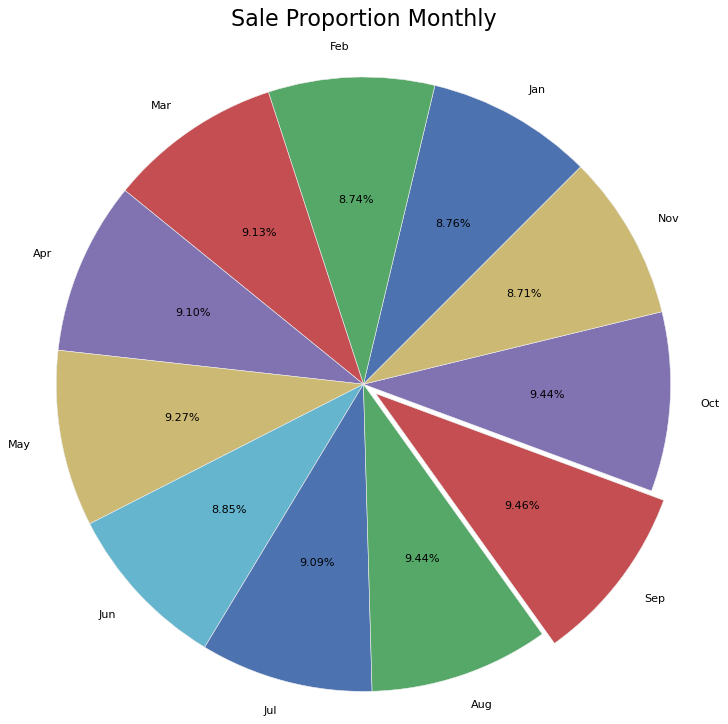

In [41]:
# Note 
""" radius is to pie charts as figsize is to bar chart
    autopct = auto percent
    explode = to highlight, significant pie(s)
    startangle = to rotate the pie """

# plotting pie chart
plt.style.use('seaborn-deep')
plt.pie(
    x=groupd["Sales"], 
    labels=groupd["Month"], 
    radius=2, autopct="%0.2f%%", 
    explode=[0,0,0,0,0,0,0,0,0.1,0,0], 
    startangle=45
)

plt.title('Sale Proportion Monthly', fontsize=20, pad=150)

### Donut Chart

Text(0.5, 1.0, 'Sale Proportion Monthly')

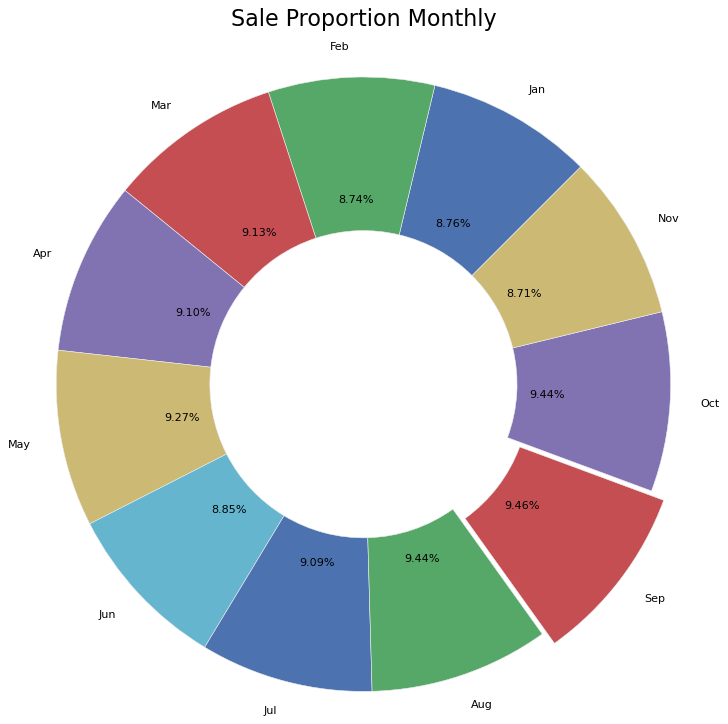

In [43]:
# Note 
""" radius is to pie charts as figsize is to bar chart
    autopct = auto percent
    explode = to highlight, significant pie(s)
    startangle = to rotate the pie
    wedgeprops = key attribute for donut charts """

# plotting pie chart
plt.pie(
    x=groupd["Sales"], 
    labels=groupd["Month"], 
    radius=2, autopct="%0.2f%%", 
    explode=[0,0,0,0,0,0,0,0,0.1,0,0], 
    startangle=45,
    wedgeprops = {"width":1}
)

plt.title('Sale Proportion Monthly', fontsize=20, pad=150)

### Note
To plot a `horizontal Bar Chart` use the `plot.barh()` function

### Grid Plots

Text(0.5, 1.0, 'Scatter Plot')

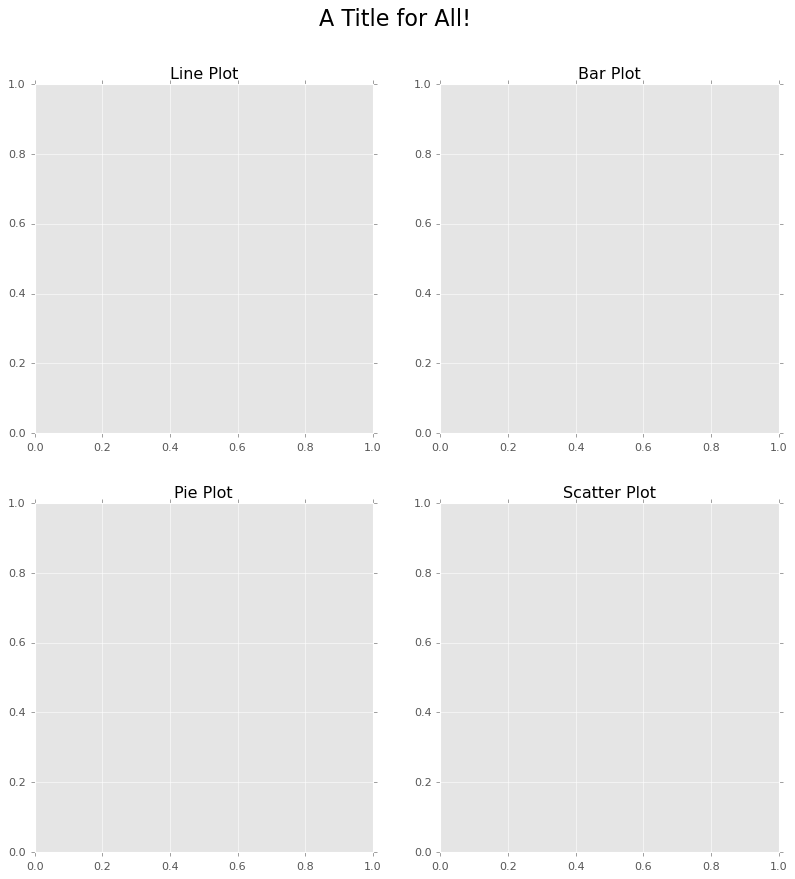

In [44]:
# figure=Grid frame, plt=canvas

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Grid title
fig.suptitle("A Title for All!", fontsize=20)

# plots; plotx.plot/bar/pie/scatter()
plot1=axs[0,0] 
plot2=axs[0,1] 
plot3=axs[1,0]
plot4=axs[1,1]

# plot titles
plot1.set_title("Line Plot")
plot2.set_title("Bar Plot")
plot3.set_title("Pie Plot")
plot4.set_title("Scatter Plot")
